# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

from sklearn.metrics import confusion_matrix

import keras
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, classification_report

## Loading the dataset

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn.csv", low_memory=False)

## Data Overview

In [4]:
df = data.copy()

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

* The dataset contains 10,000 rows and 14 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The dataset contains many numerical columns and a few categorical.

We can also see that 10000 values for each column are non-null values.

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* The mean value for age is 38 and median value is 37 which indicates that majority of the customers are under the age of 38
* The mean credit score is 650 and the median is 652 which also indicates that majority of the credit scores for customers are under 650.
* Majority of the customers have had a 5 year tenure with the bank

In [9]:
# check for duplicate values in the data
df.duplicated().sum()

0

In [10]:
# Checks for unique values in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [13]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

## What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?

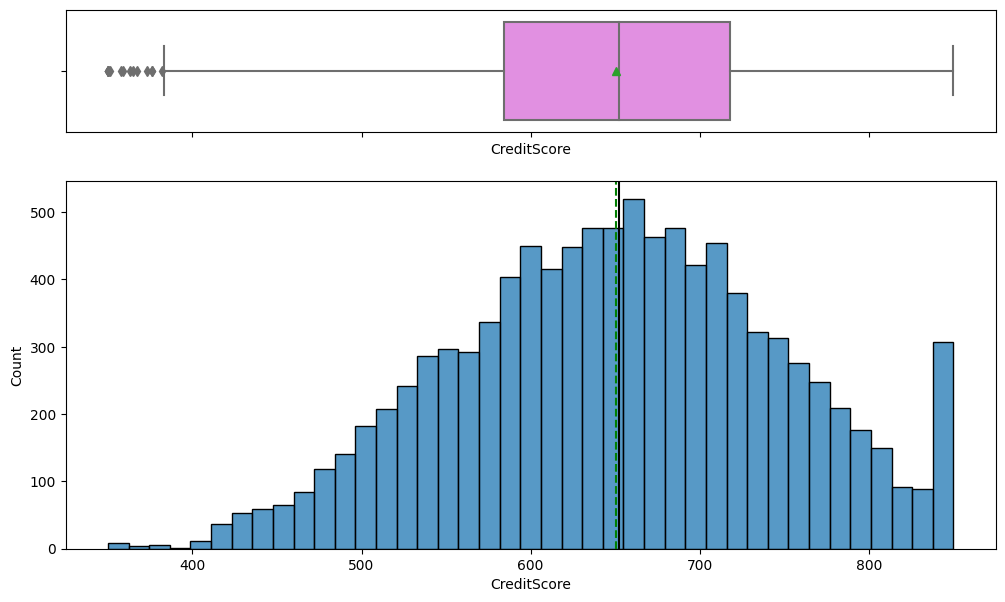

In [14]:
histogram_boxplot(df, 'CreditScore')

* The credit score of customers appears to be normally distributed.
* There are a few outliers in the dataset.

## How many active members are there with the bank?

<Axes: xlabel='IsActiveMember', ylabel='count'>

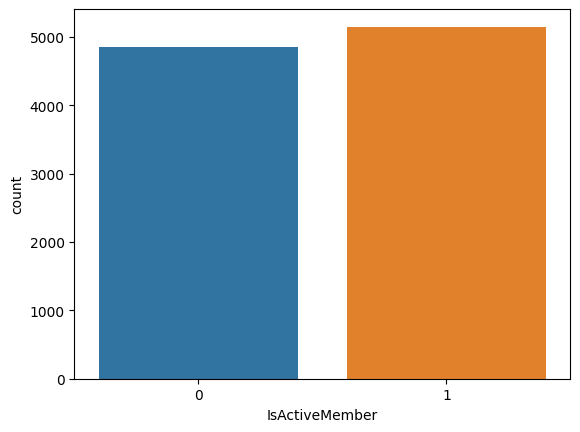

In [15]:
sns.countplot(x='IsActiveMember', data=df)

In [16]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

* There are a total of 5151 active members with the bank

## How are the different customer attributes correlated to each other?

<ipython-input-17-d207b7d46160>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


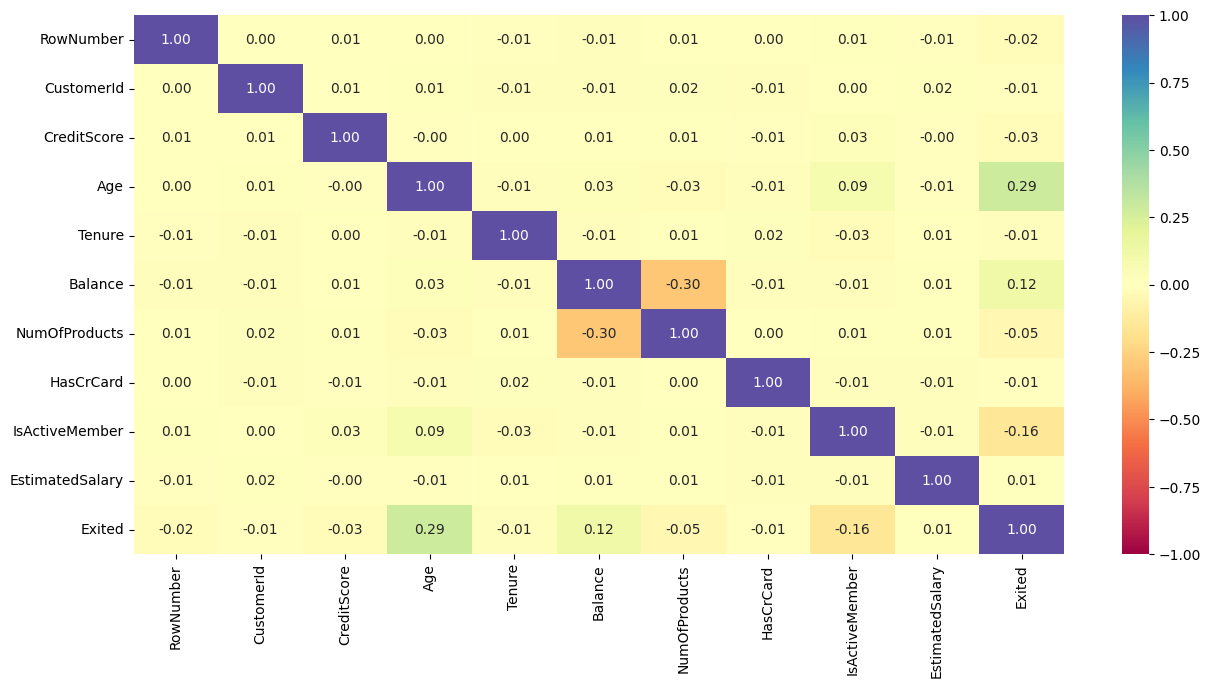

In [17]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* It appears the strongest customer attribute in relation to churn is the age attribute

## Who is churning more when compared to males and females?

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


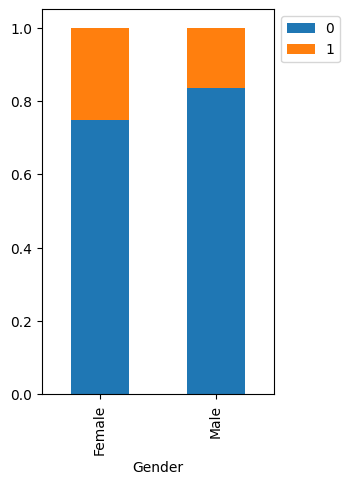

In [18]:
stacked_barplot(df, 'Gender', 'Exited')

* Females have churned 1139 times compared to 898 times for males. Therefore, females are churning more than males.

## Customers from which geographical part are churning more?

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


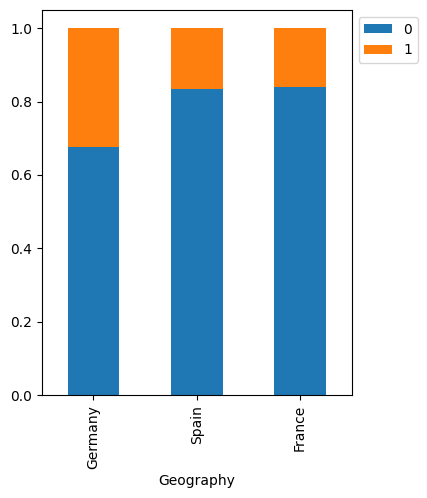

In [19]:
stacked_barplot(df, 'Geography', 'Exited')

* Customers from Germany are churning more compared to France and Spain.

## Univariate Analysis

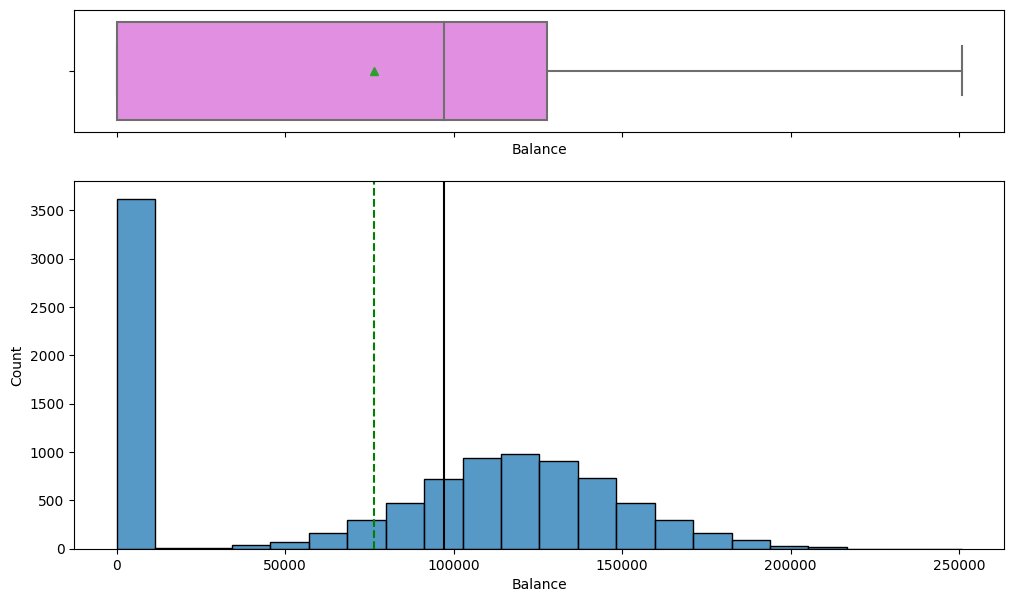

In [20]:
histogram_boxplot(df, 'Balance')

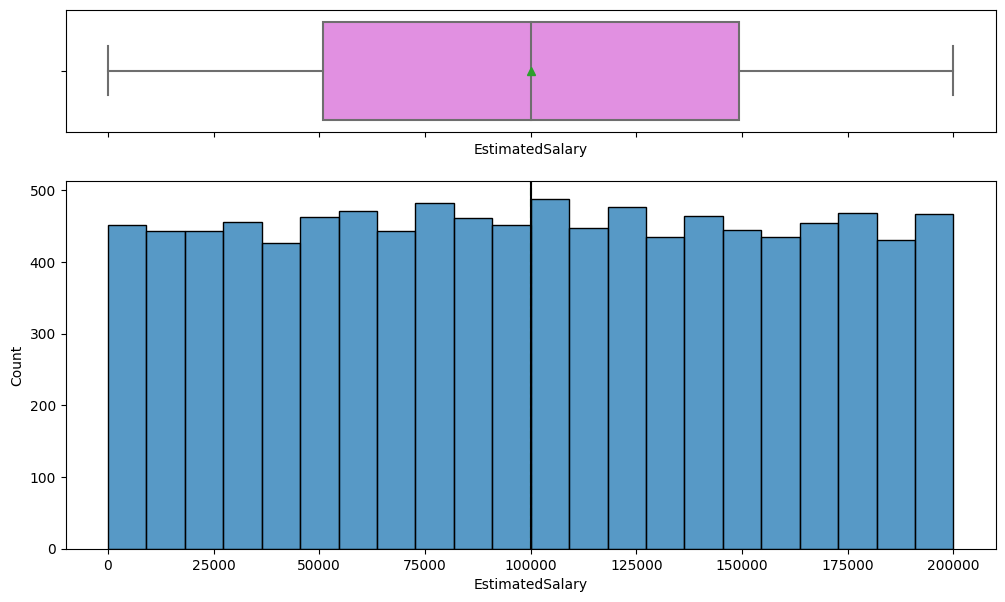

In [21]:
histogram_boxplot(df, 'EstimatedSalary')

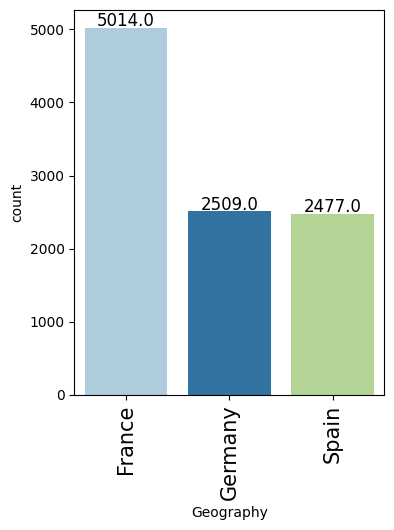

In [130]:
labeled_barplot(df, 'Geography')

* Most of the bank customers are located in France

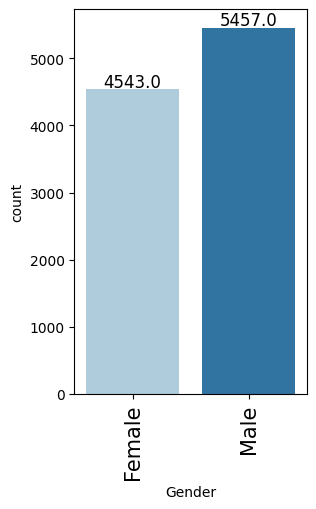

In [131]:
labeled_barplot(df, 'Gender')

* The bank has more male customers than females

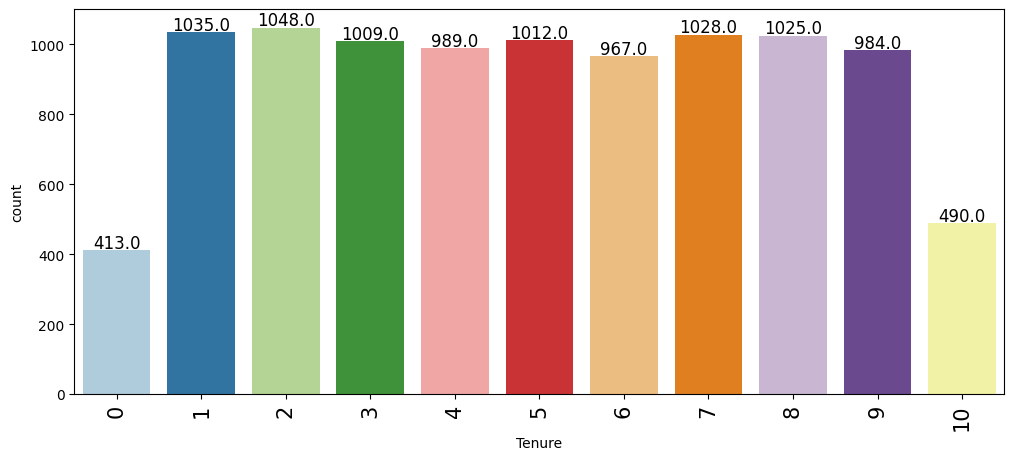

In [132]:
labeled_barplot(df, 'Tenure')

* Most customers have a tenure of between 1-9 years

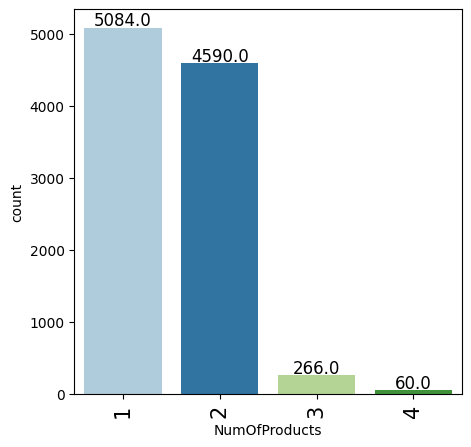

In [133]:
labeled_barplot(df, 'NumOfProducts')

* About 96% of customers at the bank have purchased between 1-2 products

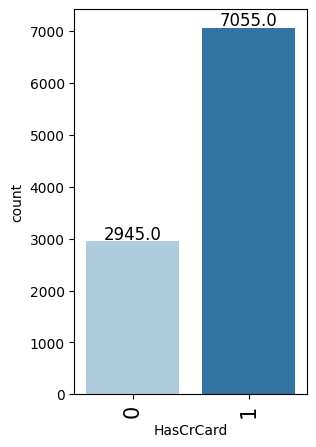

In [134]:
labeled_barplot(df, 'HasCrCard')

* About 70% of customers at the bank have a credit card

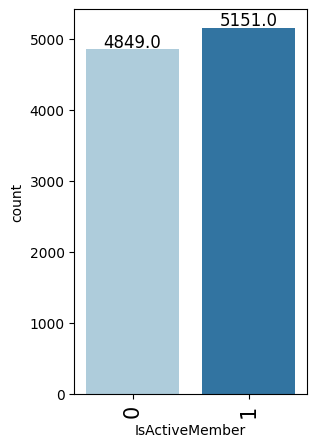

In [138]:
labeled_barplot(df, 'IsActiveMember')

* There are slightly more active members compared to none active members

<Axes: xlabel='Exited', ylabel='count'>

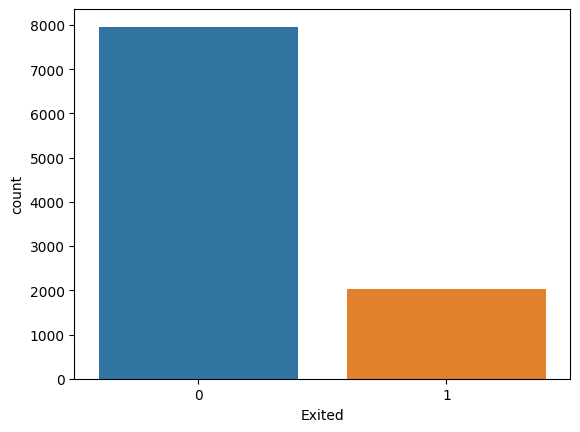

In [22]:
sns.countplot(x='Exited', data=df)

* There are far less customers who churn compared to the customers that do not.
* The Exited column is also extremely imbalanced.

## Bivariate Analysis

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


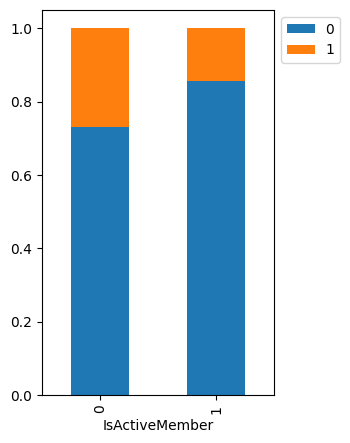

In [140]:
stacked_barplot(df, 'IsActiveMember', 'Exited')

* 63% of the customers who churned are active members, while the other 37% members are non-active members

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


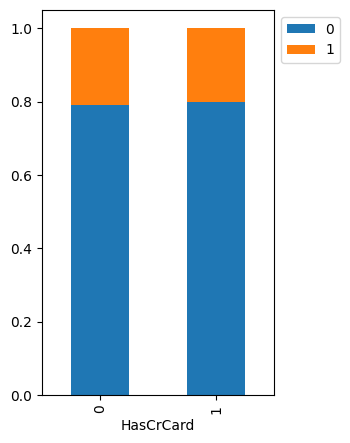

In [141]:
stacked_barplot(df, 'HasCrCard', 'Exited')

* 70% of the customers who exited also have a credit card
* 30% of the customers who exited do not have a credit card

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [23]:
# Drop columns that are not needed
df = df.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1)

In [24]:
# Convert objects to categorical columns
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [25]:
# Split data
X = df.drop(["Exited"], axis=1)
y = df["Exited"]

In [26]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle = True)

In [27]:
X_temp, X_val, y_temp, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1, stratify=y_train, shuffle = True
)

In [28]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)
X_val = pd.get_dummies(data=X_test, drop_first=True)

In [29]:
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

## Model Building

### Model Evaluation Criterion

### We will be using Recall as a metric for our model performance because here the company could face 2 types of losses due to churn
1. Predicting a customer is exiting and the customer is not exiting
2. Predicting a customer is not exiting and customer is exiting

### Which Loss is greater?
* Predicting that customer is not exiting but he/she is exiting. Which can cause loss to the banks because due to wrong identification, and the bank will not be able to take any initiative for those customers.

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants recall to be maximized i.e. we need to reduce the number of false negatives.

In [30]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report

In [32]:
# Initializing the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

In [57]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [59]:
history_n=model.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100
250/250 [==============================] - 2s 5ms/step - loss: 0.2899 - accuracy: 0.8823 - val_loss: 0.8802 - val_accuracy: 0.7085
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.2877 - accuracy: 0.8805 - val_loss: 0.9013 - val_accuracy: 0.7090
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2874 - accuracy: 0.8819 - val_loss: 0.8945 - val_accuracy: 0.6940
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.2869 - accuracy: 0.8827 - val_loss: 0.8873 - val_accuracy: 0.7095
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2860 - accuracy: 0.8820 - val_loss: 0.8930 - val_accuracy: 0.6945
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2857 - accuracy: 0.8817 - val_loss: 0.8884 - val_accuracy: 0.7075
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.8829 - val_loss: 0.8825 - val_accuracy: 0.7065

63/63 [==============================] - 0s 5ms/step - loss: 0.3720 - accuracy: 0.8605


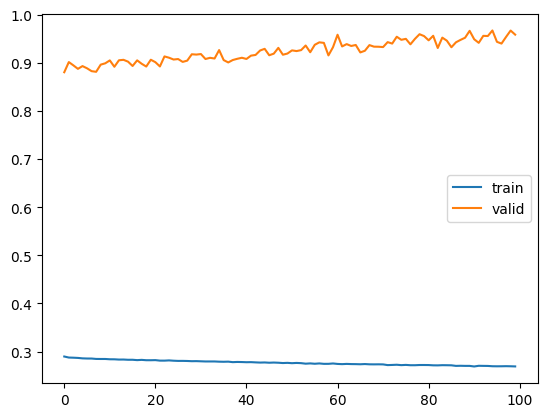

In [61]:
# Loss Function

# Capturing learning history per epoch
hist  = pd.DataFrame(history_n.history)
hist['epoch'] = history_n.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

results = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step


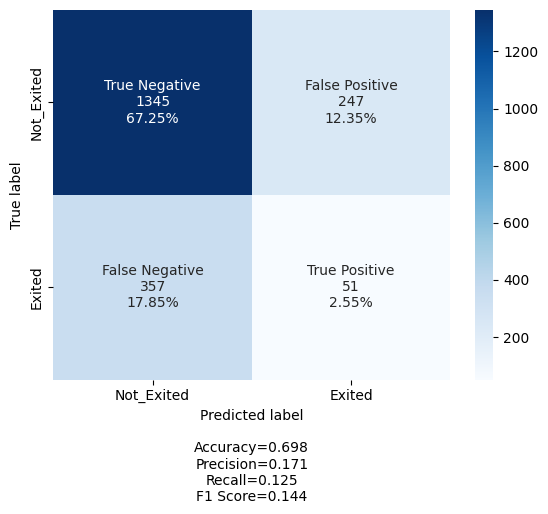

In [63]:
y_pred1=model.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Building: Neural Network model with Adam Optimizer

In [66]:
model_a = Sequential()
model_a.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Input layer
model_a.add(Dense(32, activation='relu'))  # Hidden layer
model_a.add(Dense(1, activation='sigmoid'))  # Output layer

In [67]:
# Compile the model
optimizer = Adam(learning_rate=1e-3)
model_a.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
model_a.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                768       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Train the model
history = model_a.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4545 - accuracy: 0.8005 - val_loss: 0.4258 - val_accuracy: 0.8250
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8197 - val_loss: 0.4155 - val_accuracy: 0.8331
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8284 - val_loss: 0.4070 - val_accuracy: 0.8400
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8331 - val_loss: 0.4014 - val_accuracy: 0.8413
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8366 - val_loss: 0.3869 - val_accuracy: 0.8550
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8403 - val_loss: 0.3796 - val_accuracy: 0.8494
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8433 - val_loss: 0.3687 - val_accuracy: 0.8494

# Loss Function

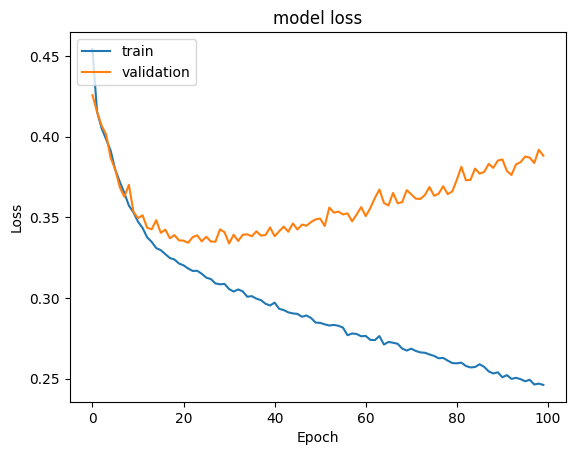

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

250/250 [==============================] - 3s 10ms/step
Best Threshold=0.216051, G-Mean=0.844


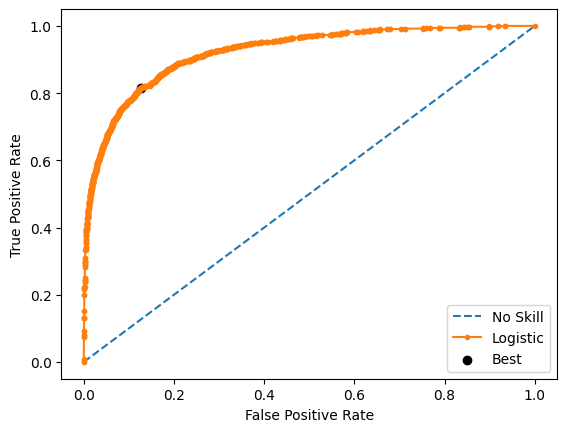

In [72]:
# predict probabilities
yhat = model_a.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [73]:
#Predicting the results using best as a threshold
y_pred_a=model_a.predict(X_val)
y_pred_a = (y_pred_a > thresholds[ix])
y_pred_a

63/63 [==============================] - 1s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [75]:
cr=classification_report(y_val,y_pred_a)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1592
           1       0.19      0.25      0.21       408

    accuracy                           0.63      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.67      0.63      0.64      2000



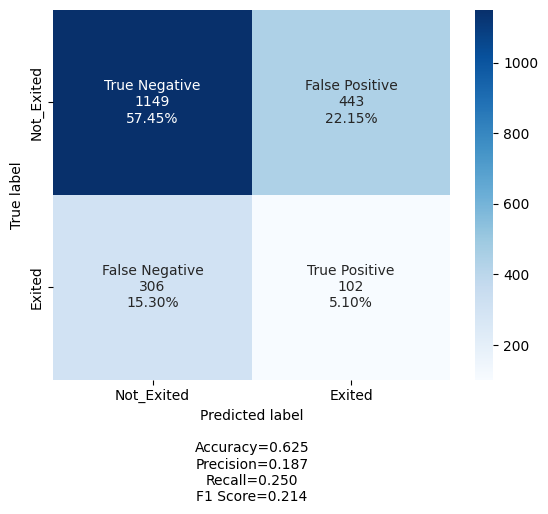

In [76]:
cm1=confusion_matrix(y_val, y_pred_a)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with Dropout

In [77]:
model2 = Sequential()
model2.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))  # Input layer
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))  # Hidden layer
model2.add(Dropout(0.1))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(1, activation='sigmoid'))  # Output layer

In [78]:
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                384       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-traina

In [79]:
# Train the model
history2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
200/200 [==============================] - 2s 6ms/step - loss: 0.4614 - accuracy: 0.8008 - val_loss: 0.4277 - val_accuracy: 0.8100
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4258 - accuracy: 0.8150 - val_loss: 0.4131 - val_accuracy: 0.8400
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8186 - val_loss: 0.4047 - val_accuracy: 0.8431
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8239 - val_loss: 0.3991 - val_accuracy: 0.8406
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4117 - accuracy: 0.8209 - val_loss: 0.3954 - val_accuracy: 0.8481
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4060 - accuracy: 0.8263 - val_loss: 0.3916 - val_accuracy: 0.8481
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4011 - accuracy: 0.8280 - val_loss: 0.3878 - val_accuracy: 0.8512

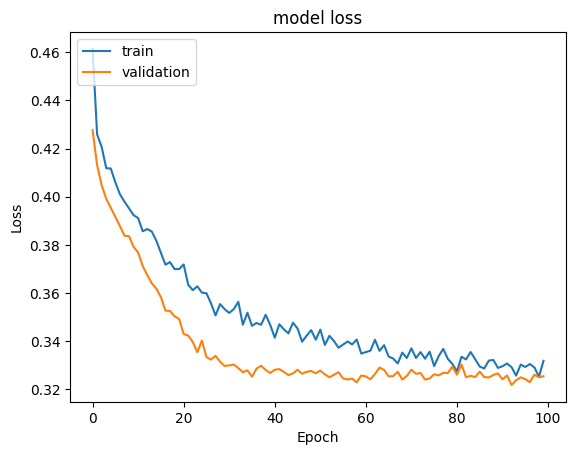

In [81]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

250/250 [==============================] - 1s 2ms/step
Best Threshold=0.220128, G-Mean=0.805


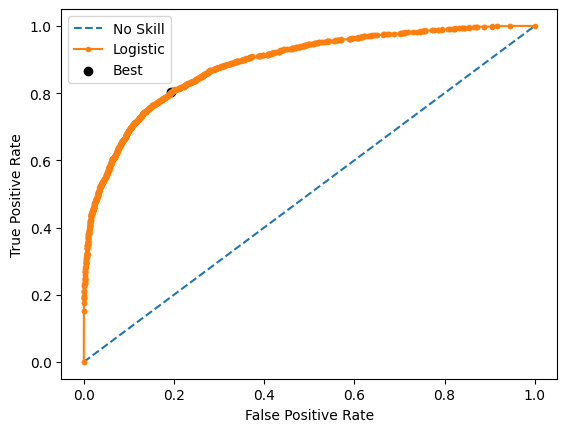

In [82]:
# predict probabilities
yhat = model2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

* By adding a dropout layer we can see that the loss is significantly lower than before.

In [85]:
#Predicting the results using best as a threshold
y_pred_e=model2.predict(X_val)
y_pred2 = (y_pred_e > thresholds[ix])
y_pred2

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

Classification Report

In [86]:
cr=classification_report(y_val,y_pred2)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.66      0.72      1592
           1       0.19      0.31      0.23       408

    accuracy                           0.59      2000
   macro avg       0.49      0.48      0.47      2000
weighted avg       0.66      0.59      0.62      2000



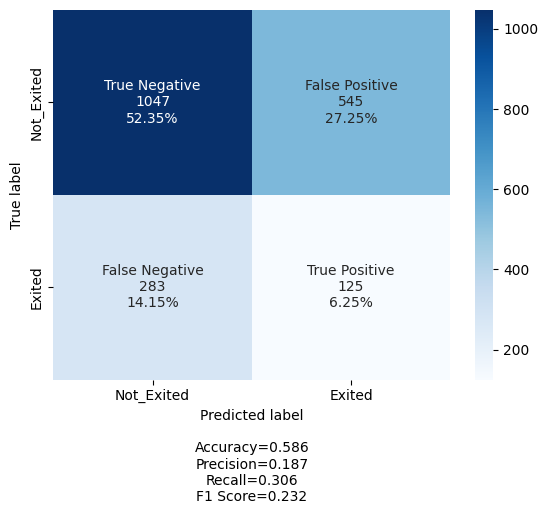

In [88]:
cm1=confusion_matrix(y_val, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with Hyperparameter tuning

In [41]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.8 MB/s eta 0:00:00a 0:00:01


In [89]:
from keras_tuner import HyperModel

class ChurnModel(HyperModel):

    def build(self, hp):
        model = Sequential()
        model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
        model.add(Dropout(0.5))
        # Tune the number of units in the first Dense layer
        units = hp.Int('units', min_value=32, max_value=512, step=32)
        model.add(Dense(units=units, activation='relu'))

        model.add(Dense(1, activation='sigmoid'))

        # Tune the learning rate
        lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        return model

In [90]:
from keras_tuner.tuners import RandomSearch

hypermodel = ChurnModel()

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='random_search',
    project_name='inn_churn'
)

tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [91]:
tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_val, y_val))

In [92]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hyperparameters.get('units')} and the optimal learning rate for the optimizer
is {best_hyperparameters.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 64 and the optimal learning rate for the optimizer
is 0.0001.



In [101]:
model3 = tuner.hypermodel.build(best_hyperparameters)
history3 = model3.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)
val_acc_per_epoch = history3.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5644 - accuracy: 0.7511 - val_loss: 0.4873 - val_accuracy: 0.8000
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4964 - accuracy: 0.7950 - val_loss: 0.4655 - val_accuracy: 0.8000
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4824 - accuracy: 0.7952 - val_loss: 0.4549 - val_accuracy: 0.8000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7948 - val_loss: 0.4481 - val_accuracy: 0.8000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7962 - val_loss: 0.4438 - val_accuracy: 0.7994
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7966 - val_loss: 0.4406 - val_accuracy: 0.8031
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7966 - val_loss: 0.4381 - val_accuracy: 0.8044

Loss function

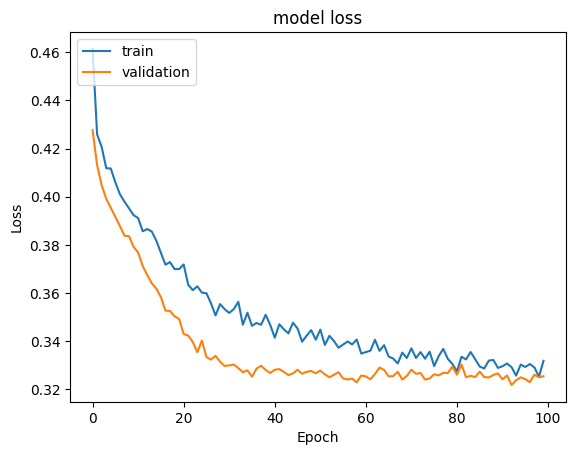

In [102]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

250/250 [==============================] - 2s 6ms/step
Best Threshold=0.214323, G-Mean=0.715


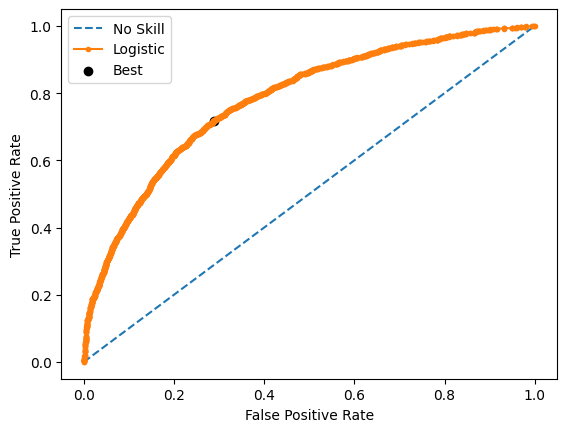

In [95]:
# predict probabilities
yhat = model3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [96]:
y_pred_h = model3.predict(X_val)
print(y_pred_h)

63/63 [==============================] - 1s 4ms/step
[[0.0936472 ]
 [0.24758834]
 [0.14851171]
 ...
 [0.6014266 ]
 [0.119671  ]
 [0.1303756 ]]


In [104]:
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [ True]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [105]:
cr=classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.60      0.68      1592
           1       0.19      0.36      0.25       408

    accuracy                           0.55      2000
   macro avg       0.49      0.48      0.47      2000
weighted avg       0.66      0.55      0.59      2000



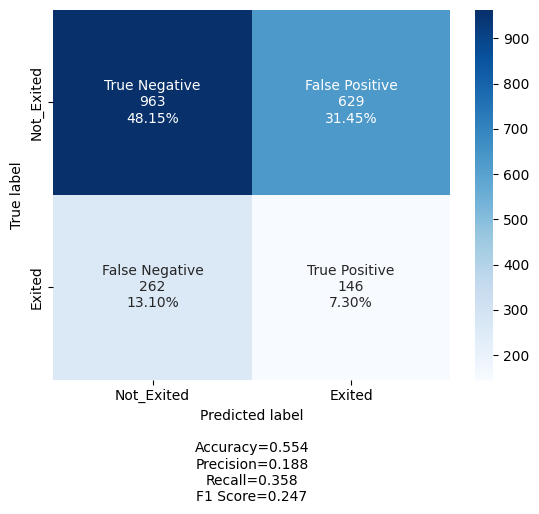

In [107]:
cm_h=confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [106]:
hypermodel = tuner.hypermodel.build(best_hyperparameters)
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2, batch_size=32)

Epoch 1/99
200/200 [==============================] - 2s 6ms/step - loss: 0.5733 - accuracy: 0.7497 - val_loss: 0.5022 - val_accuracy: 0.8000
Epoch 2/99
200/200 [==============================] - 1s 3ms/step - loss: 0.5085 - accuracy: 0.7947 - val_loss: 0.4793 - val_accuracy: 0.8000
Epoch 3/99
200/200 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7958 - val_loss: 0.4653 - val_accuracy: 0.8000
Epoch 4/99
200/200 [==============================] - 1s 3ms/step - loss: 0.4760 - accuracy: 0.7953 - val_loss: 0.4561 - val_accuracy: 0.8006
Epoch 5/99
200/200 [==============================] - 1s 3ms/step - loss: 0.4725 - accuracy: 0.7948 - val_loss: 0.4503 - val_accuracy: 0.8006
Epoch 6/99
200/200 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.7998 - val_loss: 0.4456 - val_accuracy: 0.8019
Epoch 7/99
200/200 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7991 - val_loss: 0.4419 - val_accuracy: 0.8012
Epoch 

### Model Improvement: Neural Network model with balanced data

In [54]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1630
Before UpSampling, counts of label 'No': 6370 

After UpSampling, counts of label 'Yes': 6370
After UpSampling, counts of label 'No': 6370 

After UpSampling, the shape of train_X: (12740, 11)
After UpSampling, the shape of train_y: (12740,) 



In [55]:
hypermodel2 = tuner.hypermodel.build(best_hyperparameters)


Epoch 1/20
319/319 [==============================] - 2s 3ms/step - loss: 0.6231 - accuracy: 0.6521 - val_loss: 0.8632 - val_accuracy: 0.2724
Epoch 2/20
319/319 [==============================] - 1s 2ms/step - loss: 0.5724 - accuracy: 0.7008 - val_loss: 0.8234 - val_accuracy: 0.4400
Epoch 3/20
319/319 [==============================] - 1s 2ms/step - loss: 0.5485 - accuracy: 0.7243 - val_loss: 0.7902 - val_accuracy: 0.5094
Epoch 4/20
319/319 [==============================] - 1s 2ms/step - loss: 0.5428 - accuracy: 0.7288 - val_loss: 0.7873 - val_accuracy: 0.5306
Epoch 5/20
319/319 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7343 - val_loss: 0.7860 - val_accuracy: 0.5467
Epoch 6/20
319/319 [==============================] - 1s 2ms/step - loss: 0.5299 - accuracy: 0.7364 - val_loss: 0.7612 - val_accuracy: 0.5730
Epoch 7/20
319/319 [==============================] - 1s 4ms/step - loss: 0.5256 - accuracy: 0.7385 - val_loss: 0.7271 - val_accuracy: 0.6020
Epoch 

In [114]:
hypermodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                768       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [116]:
# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complining the model with binary cross entropy as loss and accuracy as metrics
hypermodel.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

In [118]:
history_hyp = hypermodel2.fit(X_train_over, y_train_over, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
319/319 [==============================] - 4s 12ms/step - loss: 0.4020 - accuracy: 0.8138 - val_loss: 0.5422 - val_accuracy: 0.7151
Epoch 2/100
319/319 [==============================] - 2s 6ms/step - loss: 0.4028 - accuracy: 0.8148 - val_loss: 0.5459 - val_accuracy: 0.7080
Epoch 3/100
319/319 [==============================] - 1s 4ms/step - loss: 0.4013 - accuracy: 0.8143 - val_loss: 0.5634 - val_accuracy: 0.6986
Epoch 4/100
319/319 [==============================] - 1s 4ms/step - loss: 0.3981 - accuracy: 0.8149 - val_loss: 0.5610 - val_accuracy: 0.7021
Epoch 5/100
319/319 [==============================] - 2s 5ms/step - loss: 0.3997 - accuracy: 0.8161 - val_loss: 0.5580 - val_accuracy: 0.7025
Epoch 6/100
319/319 [==============================] - 2s 7ms/step - loss: 0.4007 - accuracy: 0.8138 - val_loss: 0.5830 - val_accuracy: 0.6864
Epoch 7/100
319/319 [==============================] - 1s 4ms/step - loss: 0.4025 - accuracy: 0.8134 - val_loss: 0.5582 - val_accuracy: 0.700

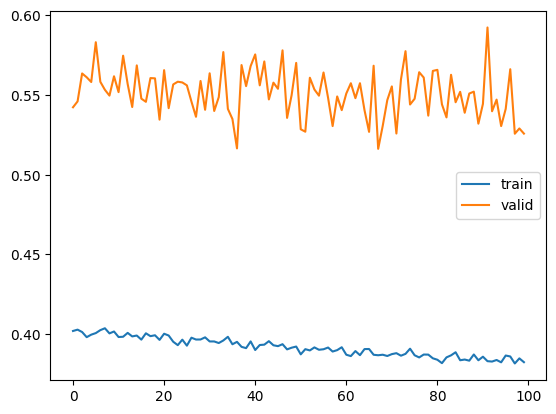

In [120]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_hyp.history)
hist['epoch'] = history_hyp.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

* Although we cleaned up the imbalanced data, the accuracy is still 82% which indicates that the performance of the model did not change when being trained by balanced data

250/250 [==============================] - 1s 2ms/step
Best Threshold=0.211359, G-Mean=0.748


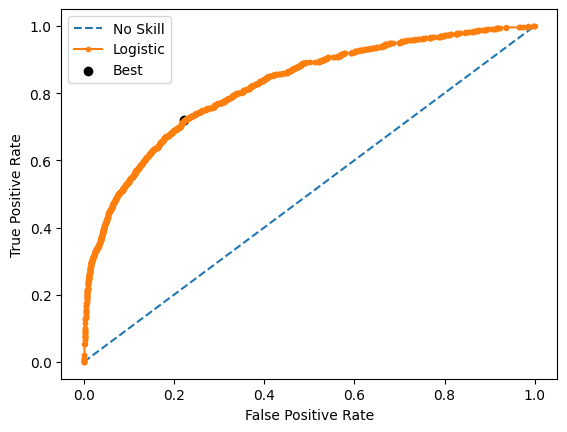

In [119]:
# Finding the optimal threshold
yhat = hypermodel.predict(X_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [122]:
y_pred_h = hypermodel.predict(X_val)
#Predicting the results using tuned threshold
y_pred_h = (y_pred_h >thresholds[ix])
y_pred_h

63/63 [==============================] - 1s 13ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [124]:
cr=classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.67      0.72      1592
           1       0.19      0.30      0.23       408

    accuracy                           0.59      2000
   macro avg       0.49      0.48      0.48      2000
weighted avg       0.67      0.59      0.62      2000



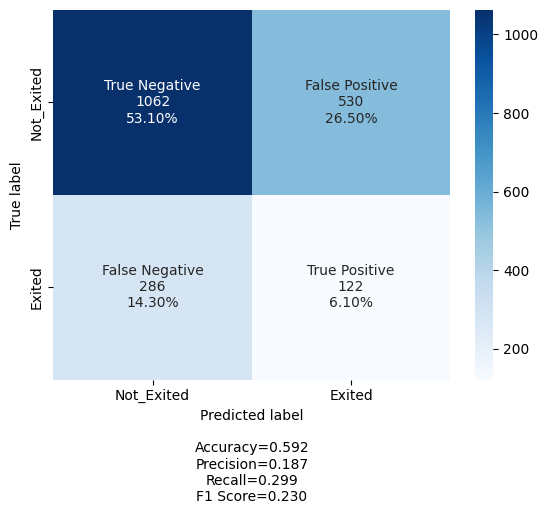

In [125]:
cm_s=confusion_matrix(y_val, y_pred_h)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Final Model

250/250 [==============================] - 1s 3ms/step
Best Threshold=0.211359, G-Mean=0.748


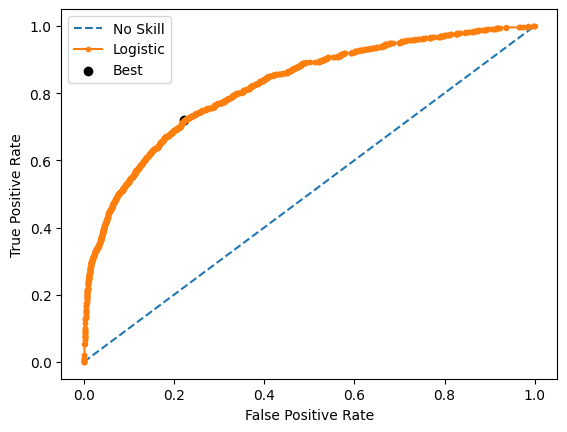

In [126]:
yhat = hypermodel.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [127]:
y_pred_test = hypermodel.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 4ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [128]:
cr=classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1593
           1       0.45      0.71      0.55       407

    accuracy                           0.76      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.82      0.76      0.78      2000



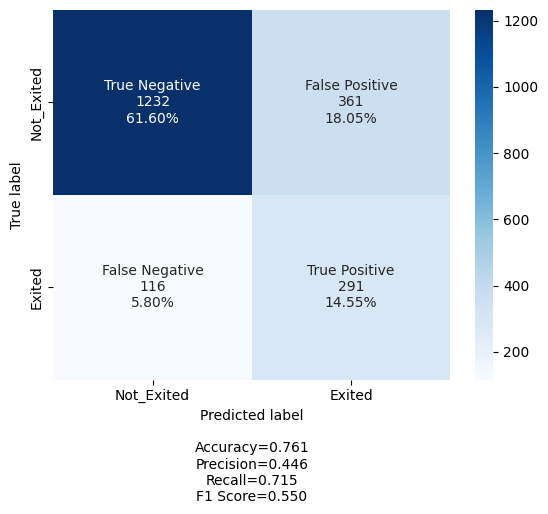

In [129]:
cm_h=confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

* The model configured with hyperparameters performed significantly better on the test data set compared to the train/validation sets.

## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

* Females are churning significantly more than males, I would recommend consulting with the customer satisfaction team to figure out a plan of action on how to better serve female customers
* France has the most customers by the bank and has the most churn, I recommend honing in on France and conduct a survey to determine how best to serve the customers in France.
* I also recommend the bank create a survey for active members who have credit cards, I noticed that many of the customers who are churning were active members who also had credit cards. So I think it would be vital to understand why active customers who have credit cards are churning.
* 70% of customers currently have a credit card therefore we have a large sample size to gain feedback on the possible things that are contributing to the churn of customers

___